# DICOM load

reference - https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data

In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from pydicom.data import get_testdata_file
import logging
import sys

In [2]:
BASE_PATH = "/mnt/d/Data/medical/dicom_sample/pneumothorax/dicom-images-test"
SAMPLE_IMAGE_PATH = list(Path(BASE_PATH).glob("*"))
dicom_img_list = [list(i.glob("*/*.dcm"))[0] for i in SAMPLE_IMAGE_PATH]

In [3]:
print(dicom_img_list[:2])

[PosixPath('/mnt/d/Data/medical/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5797.1517875190.762693/1.2.276.0.7230010.3.1.3.8323329.5797.1517875190.762692/1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694.dcm'), PosixPath('/mnt/d/Data/medical/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5798.1517875190.796715/1.2.276.0.7230010.3.1.3.8323329.5798.1517875190.796714/1.2.276.0.7230010.3.1.4.8323329.5798.1517875190.796716.dcm')]


In [4]:
number_img = 0
dcm_img = pydicom.dcmread(dicom_img_list[number_img], force=True)

In [5]:
# image meta data 확인하기

# Rows -> 이미지의 Height
# Columns -> 이미지의 width
# SOPInstanceUID -> Unique identifier로써 slice number과 같이 포함되어있다.
# ContentDate -> pixel data가 만들어진 시간을 말한다.
# SliceThickness -> 이미지의 실제 pixel과 Pixel사이의 길이를 의미한다.
# InstanceNumber -> 이미지의 장수를 의미한다. slice number.

dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                    

In [6]:
def show_dcm_info(dataset):
    print("Filename.........:", dicom_img_list[number_img])
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.get("PatientID"))
    print("Patient's Age.......:", dataset.get("PatientAge"))
    print("Patient's Sex.......:", dataset.get("PatientSex"))
    print("Modality............:", dataset.get("Modality"))
    print("Body Part Examined..:", dataset.get("BodyPartExamined"))
    print("View Position.......:", dataset.get("ViewPosition"))
    print("Image position......:", dataset.get("ImagePositionPatient"))

    if "PixelData" in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(rows=rows, cols=cols, size=len(dataset.PixelData)))
        if "PixelSpacing" in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)


def plot_pixel_array(dataset, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.........: /mnt/d/Data/medical/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5797.1517875190.762693/1.2.276.0.7230010.3.1.3.8323329.5797.1517875190.762692/1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: d6a76eb1-d814-46b1-a375-fcc796d2b0b0, 
Patient id..........: d6a76eb1-d814-46b1-a375-fcc796d2b0b0
Patient's Age.......: 81
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image position......: None
Image size.......: 1024 x 1024, 160576 bytes
Pixel spacing....: [0.14300000000000002, 0.14300000000000002]


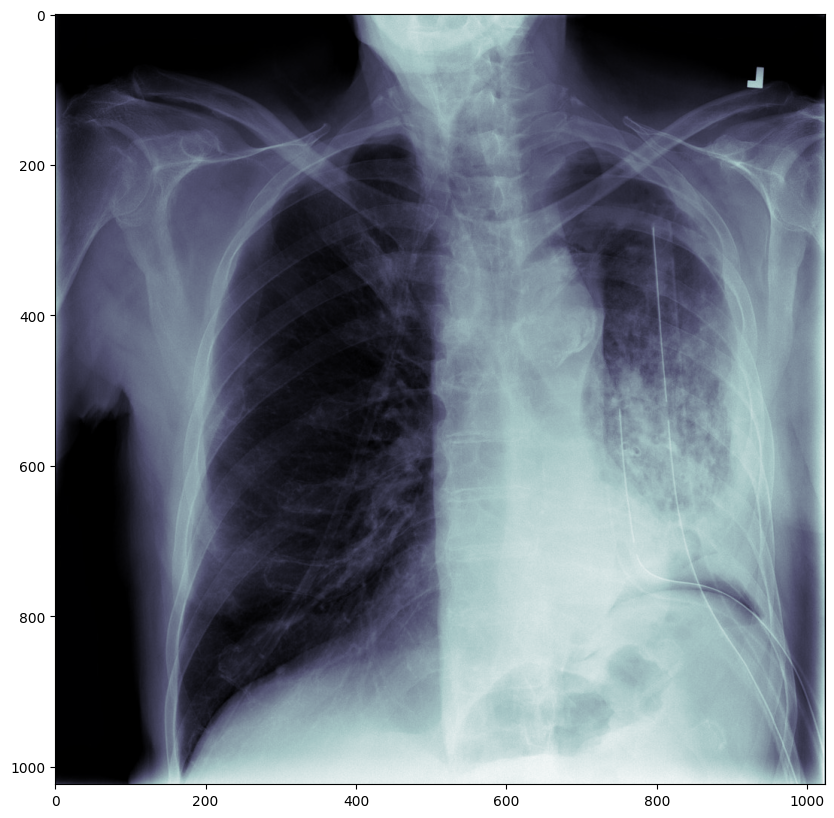

In [7]:
show_dcm_info(dcm_img)
plot_pixel_array(dcm_img)

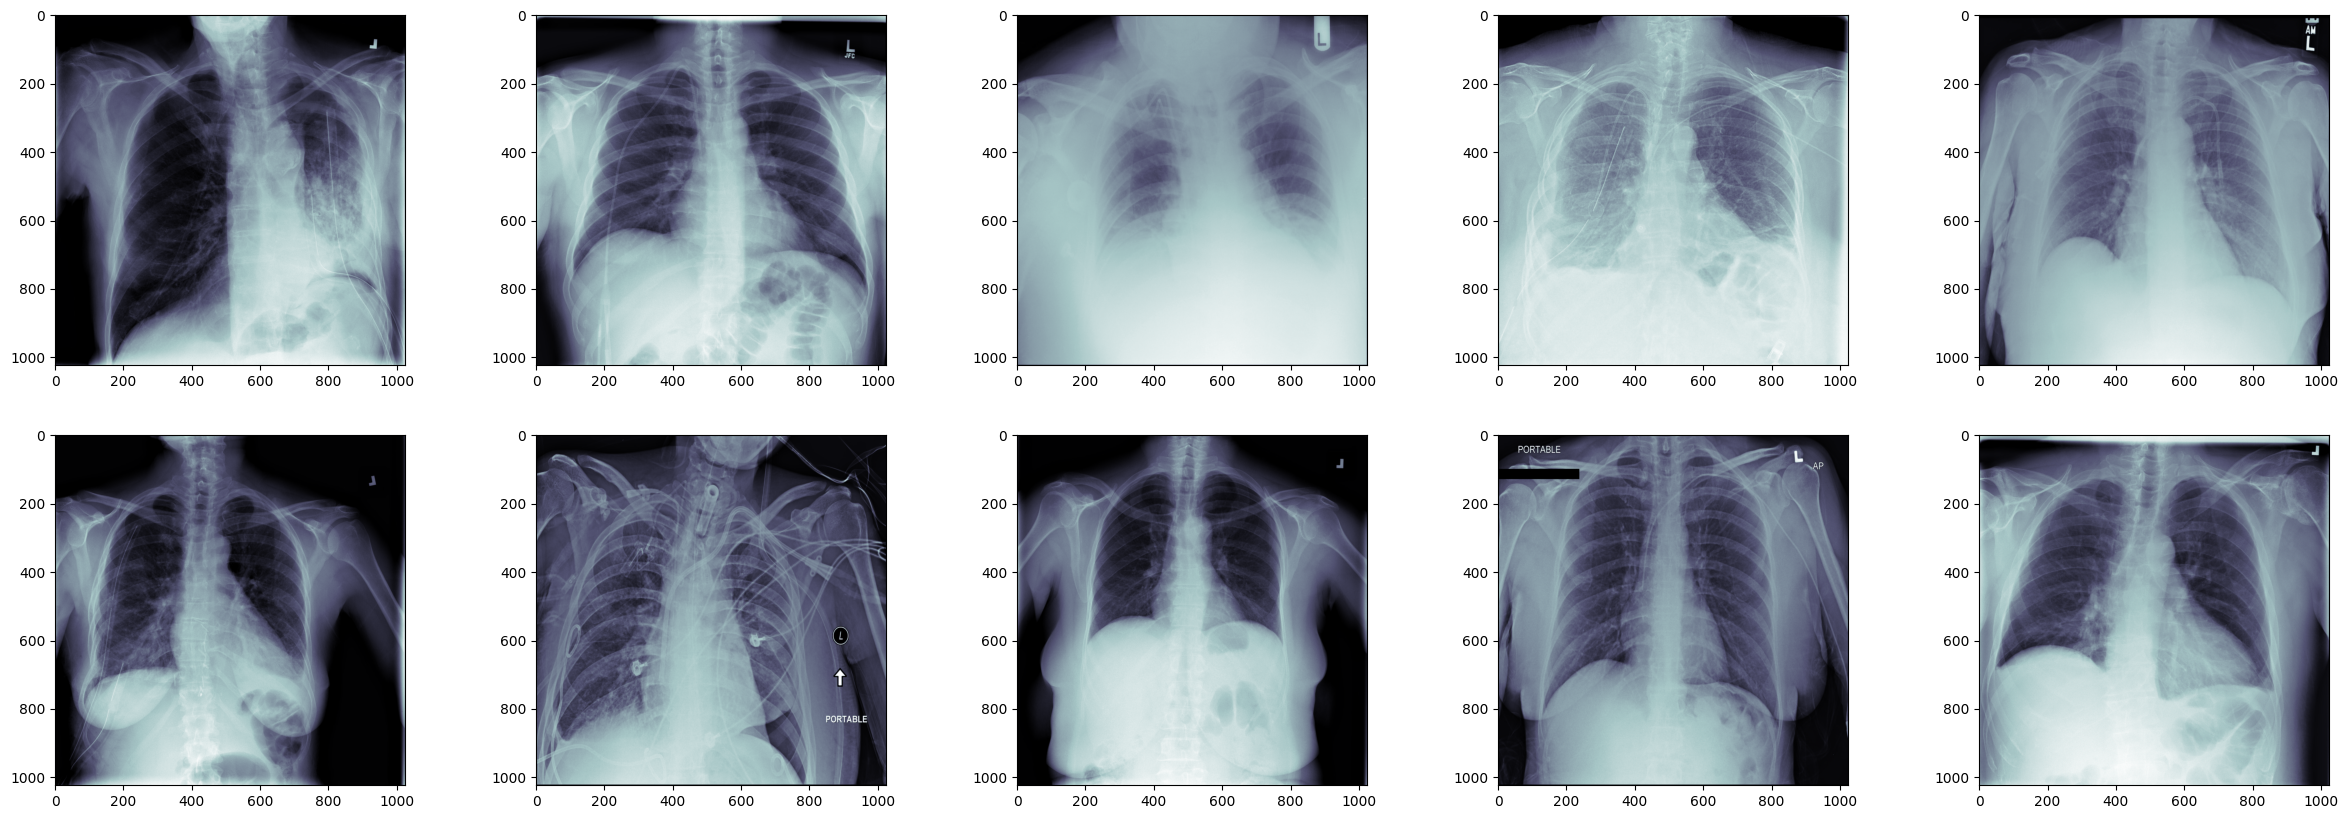

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for idx, ax in zip(range(10), axs.flatten()):
    # dcm_img = pydicom.read_file(dicom_img_list[idx]) # read_file() > dcmread()
    dcm_img = pydicom.dcmread(dicom_img_list[idx])  # read dicom image
    img = dcm_img.pixel_array  # get image array
    ax.imshow(img, cmap="bone")

# 3D image

In [9]:
from skimage.util import montage
from natsort import natsorted

In [10]:
BASE_PATH = Path("/mnt/d/Data/medical/brain_images/00825/T2w")
dicom_images = natsorted(list(BASE_PATH.glob("*.dcm")))
print(f"number of dicom images : {len(dicom_images)}")

number of dicom images : 29


In [11]:
# concat_images = np.array([pydicom.read_file(i).pixel_array for i in dicom_images]) # read_file() > dcmread()
concat_images = np.array([pydicom.dcmread(i).pixel_array for i in dicom_images])

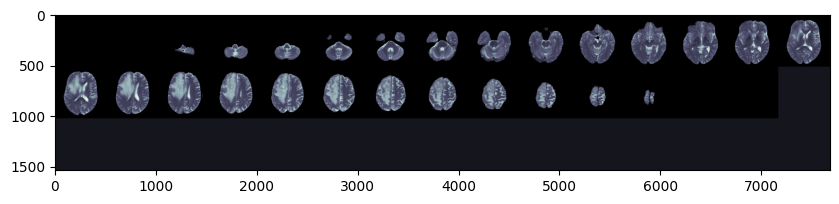

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(montage(concat_images, grid_shape=(3, 15)), cmap="bone")

# NIFTI file load

In [13]:
import dicom2nifti
import nibabel as nib

# nifiti로 변경하는 코드
dicom2nifti.convert_directory("/mnt/d/Data/medical/brain_images/00825/T2w", "./")
nifiti_path = "./8_t2w.nii.gz"

In [14]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)

In [ ]:
print(f"nifit file shape(height, width, depth) : {sample_img.shape}")  # depth - 이미지 수

nifit file shape(height, width, depth) : (512, 512, 29)


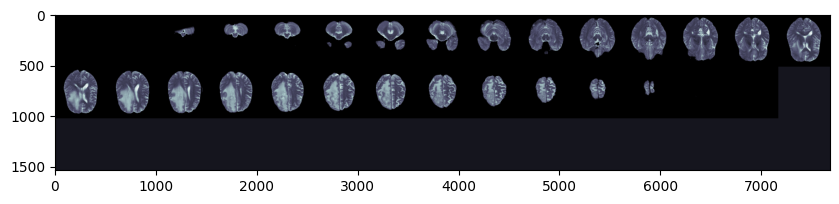

In [ ]:
# dicom으로 볼 때와 비교
# plot 3d image use motage library
transpose_img = sample_img.transpose((2, 1, 0))
plt.figure(figsize=(10, 10))
plt.imshow(montage(transpose_img, grid_shape=(3, 15)), cmap="bone")

In [ ]:
# 파일 이름은 자동으로 지정되서 저장됨
dicom2nifti.convert_directory("/mnt/d/Data/medical/brain_images/00829/T2w", "./")
# nifiti_path = "./501_t2w.nii.gz"
nifiti_path = "./9_t2w.nii.gz"

In [28]:
# nifti file load
sample_img = nib.load(nifiti_path)
sample_img = np.asanyarray(sample_img.dataobj)
print(f"nifit file shape(height, width, depth) : {sample_img.shape}")
# plot 3d image use motage library
transpose_img = sample_img.transpose((2, 1, 0))

nifit file shape(height, width, depth) : (448, 512, 28)


In [53]:
transpose_img.shape

(28, 512, 448)

In [64]:
from IPython.display import Image as show_gif
import matplotlib.animation as anim


# gif를 만들기 위한 클래스
class ImageToGIF:
    """Create GIF without saving image files."""

    def __init__(self, size=(500, 500), xy_text=(80, 30), dpi=100, cmap="CMRmap"):

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        self.cmap = cmap

        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.images = []

    def add(self, image, label, with_mask=False):
        plt.set_cmap(self.cmap)
        plt_img = self.ax.imshow(image, animated=True)
        plt_text = self.ax.text(*self.xy_text, label, color="red")
        to_plot = [plt_img, plt_text]
        self.images.append(to_plot)
        plt.close()

    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer="imagemagick", fps=fps)


# sample_data_gif = ImageToGIF()

MovieWriter imagemagick unavailable; using Pillow instead.


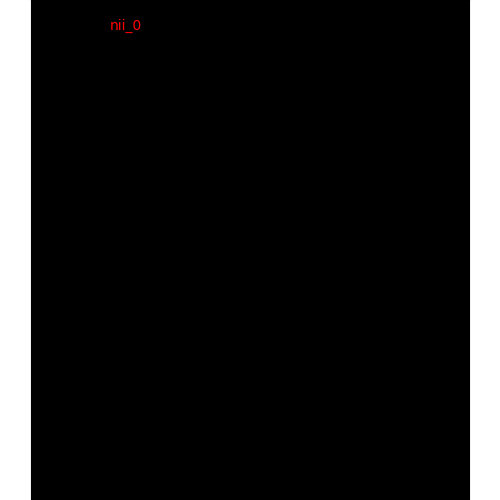

In [55]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace("/", ".").split(".")[-2]
filename = f"{label}_3d_2d.gif"

for i in range(transpose_img.shape[0]):
    image = transpose_img[i]
    sample_data_gif.add(image, label=f"{label}_{str(i)}")

sample_data_gif.save(filename, fps=15)
show_gif(filename, format="png")

In [56]:
transpose_img.shape

(28, 512, 448)

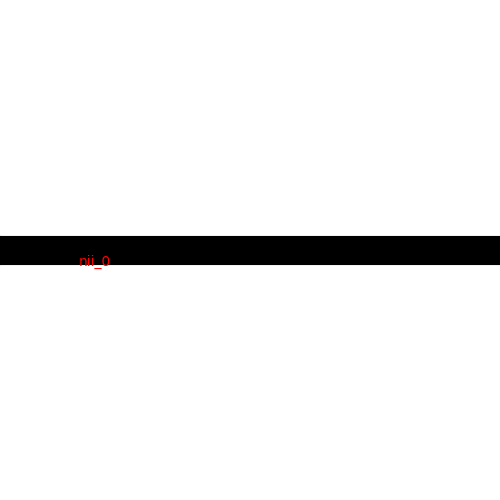

In [63]:
sample_data_gif = ImageToGIF()
label = nifiti_path.replace("/", ".").split(".")[-2]
filename = f"{label}_3d_2d.gif"


import cv2

for i in range(transpose_img.shape[2]):
    # 원본
    image = np.rot90(transpose_img[..., i], k=2, axes=(1, 0))
    sample_data_gif.add(image, label=f"{label}_{str(i)}")

    # 보기 좋게 수정한 것 - 단점 화질 저화
    # image = np.rot90(transpose_img[:, :, i], k=2)  # shape: (28, 512)
    # image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)  # resize to square
    # sample_data_gif.add(image, label=f"{label}_{str(i)}")

# sample_data_gif.save(filename, fps=15)
show_gif(filename, format="png")